In [1]:
!pip install tensorflow_addons

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers.experimental import preprocessing
from keras import models
from keras import layers
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from tensorflow.keras.callbacks import ModelCheckpoint

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
# weather1 = pd.read_csv("/content/CleanedNationalParksSpendingWeather.csv")
# park = pd.read_csv("/content/JustNationalParksSpendingWeather.csv")
# annual = pd.read_csv("/content/AnnualWeather.csv")
# # pd.merge(df1, df2, on='ID')
# weather2 = pd.merge(weather1,annual,on=["Name", "year"])
weather = pd.read_csv("/content/CompletedParks.csv")

In [ ]:
weather.columns

Index(['Jobs', 'latitude', 'longitude', 'city', 'postal', 'year', 'month',
       'elevation', 'Name', 'Total_Recreation_Visits',
       'Total_Visitor_Spending', 'Labor_Income', 'Value_Added',
       'Economic_Output', 'Temp', 'Windspeed', 'dew_point',
       'adiabatic_saturation', 'soil_moisture', 'max_air_temp', 'min_air_temp',
       'max_windspeed', 'min_windspeed', 'total_precip', 'h_i_rad_intensity',
       'Temp_13', 'Windspeed_13', 'dew_point_13', 'adiabatic_saturation_13',
       'soil_moisture_13', 'max_air_temp_13', 'min_air_temp_13',
       'max_windspeed_13', 'min_windspeed_13', 'total_precip_13',
       'h_i_rad_intensity_13', 'Location', 'Area'],
      dtype='object')

In [4]:
weather = weather.dropna(subset='Total_Visitor_Spending')

In [5]:
missing_rows = weather[weather['Total_Visitor_Spending'].isna()]
missing_rows

,Jobs,latitude,longitude,city,postal,year,month,elevation,Name,Total_Recreation_Visits,...,adiabatic_saturation_13,soil_moisture_13,max_air_temp_13,min_air_temp_13,max_windspeed_13,min_windspeed_13,total_precip_13,h_i_rad_intensity_13,Location,Area


In [6]:
weather = weather.dropna(subset='Area')
missing_rows = weather[weather["Area"].isna()]
missing_rows
# weather

,Jobs,latitude,longitude,city,postal,year,month,elevation,Name,Total_Recreation_Visits,...,adiabatic_saturation_13,soil_moisture_13,max_air_temp_13,min_air_temp_13,max_windspeed_13,min_windspeed_13,total_precip_13,h_i_rad_intensity_13,Location,Area


In [7]:
HoldoutSet = weather[weather["year"]==2016]

# df.drop(df[df['year'] == 2016].index, inplace=True)

weather.drop(weather[weather["year"]==2016].index, inplace=True)
# weather["year"].unique()
HoldoutSet.head()

,Jobs,latitude,longitude,city,postal,year,month,elevation,Name,Total_Recreation_Visits,...,adiabatic_saturation_13,soil_moisture_13,max_air_temp_13,min_air_temp_13,max_windspeed_13,min_windspeed_13,total_precip_13,h_i_rad_intensity_13,Location,Area
48,245.0,37.585866,-85.673305,Hodgenville,42748,2016,1,226.46,Abraham Lincoln Birthplace National Historical...,252495.0,...,12.07,0.7,33.86,-20.6,8.01,0.06,5.27,334.25,Kentucky,344.5
49,245.0,37.585866,-85.673305,Hodgenville,42748,2016,2,226.46,Abraham Lincoln Birthplace National Historical...,252495.0,...,12.07,0.7,33.86,-20.6,8.01,0.06,5.27,334.25,Kentucky,344.5
50,245.0,37.585866,-85.673305,Hodgenville,42748,2016,3,226.46,Abraham Lincoln Birthplace National Historical...,252495.0,...,12.07,0.7,33.86,-20.6,8.01,0.06,5.27,334.25,Kentucky,344.5
51,245.0,37.585866,-85.673305,Hodgenville,42748,2016,4,226.46,Abraham Lincoln Birthplace National Historical...,252495.0,...,12.07,0.7,33.86,-20.6,8.01,0.06,5.27,334.25,Kentucky,344.5
52,245.0,37.585866,-85.673305,Hodgenville,42748,2016,5,226.46,Abraham Lincoln Birthplace National Historical...,252495.0,...,12.07,0.7,33.86,-20.6,8.01,0.06,5.27,334.25,Kentucky,344.5


In [8]:
one_hot = pd.get_dummies(weather['month'], prefix='month')
  # Drop column B as it is now encoded
weather = weather.drop('month',axis = 1)
  # Join the encoded df
weather = weather.join(one_hot)

In [9]:
weather.columns

Index(['Jobs', 'latitude', 'longitude', 'city', 'postal', 'year', 'elevation',
       'Name', 'Total_Recreation_Visits', 'Total_Visitor_Spending',
       'Labor_Income', 'Value_Added', 'Economic_Output', 'Temp', 'Windspeed',
       'dew_point', 'adiabatic_saturation', 'soil_moisture', 'max_air_temp',
       'min_air_temp', 'max_windspeed', 'min_windspeed', 'total_precip',
       'h_i_rad_intensity', 'Temp_13', 'Windspeed_13', 'dew_point_13',
       'adiabatic_saturation_13', 'soil_moisture_13', 'max_air_temp_13',
       'min_air_temp_13', 'max_windspeed_13', 'min_windspeed_13',
       'total_precip_13', 'h_i_rad_intensity_13', 'Location', 'Area',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [10]:
X = weather.drop(['Total_Recreation_Visits', 'Total_Visitor_Spending', 'Labor_Income',
                  "Value_Added","Economic_Output", "city","postal","Name","Jobs","Location"], axis=1)
y = weather['Total_Visitor_Spending']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.8, random_state=42)
# X_test = X[X['month_11']==1]
# X_train = X[X['month_11']==0]
# print(X_train.columns)
print(X_test.size)
print(X_train.size)



# from sklearn.preprocessing import MinMaxScaler
# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train)
# # transform training data
# X_train = norm.transform(X_train)
# # transform testing dataabs
# X_test = norm.transform(X_test)

239694
958854


In [11]:
# y_test.isna()
missing_rows = X_test[y_test.isna()]
missing_rows

,latitude,longitude,year,elevation,Temp,Windspeed,dew_point,adiabatic_saturation,soil_moisture,max_air_temp,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12


In [ ]:
X_test['Temp_13']

3261     1.55
1208     4.40
3880     1.39
6060    13.62
4077    12.39
        ...  
3784    18.06
5203    21.68
5238    -7.44
5402    27.65
860      8.11
Name: Temp_13, Length: 2023, dtype: float64

In [ ]:
X_train[0]

array([0.00153421, 0.69337952, 0.22232813, 0.5       , 0.27411126,
       0.4463582 , 0.52718078, 0.42373164, 0.45304404, 0.41489362,
       0.45893794, 0.34011329, 0.52302923, 0.07878788, 0.        ,
       0.38081905, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ])

In [12]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(300, activation='relu'),
    layers.Dropout(.25),
    layers.Dense(100, activation='relu'),
    layers.Dense(30, activation='relu'),
    # layers.Flatten(),
    layers.Dense(1, activation='relu')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

checkpoint_filepath = '/content/checkpoint/'
model_checkpointing_callback = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_best_only= True,
)
# history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, callbacks=[EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True), model_checkpointing_callback])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=52, validation_data=(X_test, y_test), callbacks=[early_stop, model_checkpointing_callback])

# history = model.fit(X_train, y_train, epochs=1000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)


# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# # Train the model with the new callback
# model.fit(train_images,
#           train_labels,
#           epochs=10,
#           validation_data=(test_images, test_labels),
#           callbacks=[cp_callback])  # Pass callback to training


Epoch 1/500
473/473 [==============================] - 6s 11ms/step - loss: 14350714880.0000 - mse: 14350714880.0000 - val_loss: 16087517184.0000 - val_mse: 16087517184.0000
Epoch 2/500
473/473 [==============================] - 6s 13ms/step - loss: 13651719168.0000 - mse: 13651719168.0000 - val_loss: 15767593984.0000 - val_mse: 15767593984.0000
Epoch 3/500
473/473 [==============================] - 6s 12ms/step - loss: 12935193600.0000 - mse: 12935193600.0000 - val_loss: 12075785216.0000 - val_mse: 12075785216.0000
Epoch 4/500
473/473 [==============================] - 4s 9ms/step - loss: 12613275648.0000 - mse: 12613275648.0000 - val_loss: 14336749568.0000 - val_mse: 14336749568.0000
Epoch 5/500
473/473 [==============================] - 5s 12ms/step - loss: 12167964672.0000 - mse: 12167964672.0000 - val_loss: 14240761856.0000 - val_mse: 14240761856.0000
Epoch 6/500
473/473 [==============================] - 4s 8ms/step - loss: 12097486848.0000 - mse: 12097486848.0000 - val_loss: 142

In [13]:
predictions = np.round(model.predict(X_test),1)

193/193 [==============================] - 1s 3ms/step


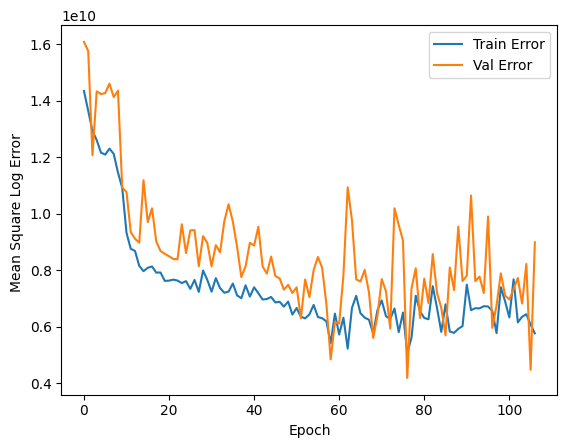

In [14]:
hist = pd.DataFrame(history.history)
hist = hist.reset_index()
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Log Error ')
    plt.plot(hist['index'], hist['loss'], label='Train Error')
    plt.plot(hist['index'], hist['val_loss'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [15]:
from sklearn.metrics import mean_squared_log_error
#result = mean_squared_error(y_test, predictions, squared=False)
result = mean_squared_log_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions, squared=False)

r2 = r2_score(y_test,predictions)
print(f"MSLE: {result}\nR2: {r2}\nMSE: {mse}")

MSLE: 3.528797071270109
R2: 0.3808238021832262
MSE: 94842.21414666557


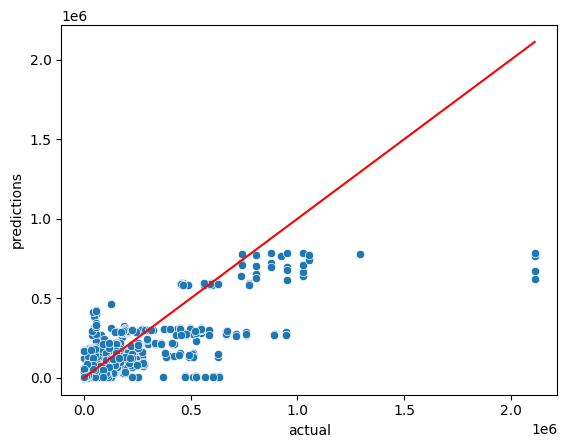

In [ ]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred


xlims =(0,pred["actual"].max())
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

96/96 [==============================] - 0s 4ms/step


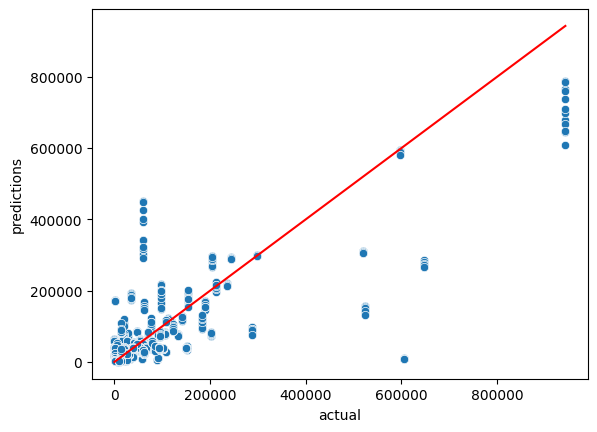

In [ ]:
X_hold = HoldoutSet.drop(['Total_Recreation_Visits', 'Total_Visitor_Spending', 'Labor_Income',
                  "Value_Added","Economic_Output", "city","postal","Name","Jobs","Location"], axis=1)
y_hold = HoldoutSet['Total_Visitor_Spending']

one_hot = pd.get_dummies(X_hold['month'], prefix='month')
  # Drop column B as it is now encoded
X_hold = X_hold.drop('month',axis = 1)
  # Join the encoded df
X_hold = X_hold.join(one_hot)
# X_hold.head()
predictions_hold = np.round(model.predict(X_hold),1)

pred = pd.DataFrame(predictions_hold,columns=['predictions'])
pred
pred['actual'] = y_hold.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred


xlims =(0,pred["actual"].max())
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_log_error
#result = mean_squared_error(y_test, predictions, squared=False)
result = mean_squared_log_error(y_hold, predictions_hold)
mse = mean_squared_error(y_hold, predictions_hold, squared=False)

r2 = r2_score(y_hold,predictions_hold)
print(f"MSLE: {result}\nR2: {r2}\nMSE: {mse}")

MSLE: 2.9067091811153736
R2: 0.6296115148272878
MSE: 65376.71545903946


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')
# https://www.tensorflow.org/tutorials/keras/save_and_load
# !zip -r '/content/"Model.zip"' '/content/saved_model/my_model"'
!zip -r my_model.zip /content/saved_model/my_model/


  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 87%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 90%)
  adding: content/saved_model/my_model/fingerprint.pb (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 62%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/saved_model/my_model/assets/ (stored 0%)


In [ ]:
!unzip my_model.zip

Archive:  my_model.zip
replace content/saved_model/my_model/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
model = tf.keras.models.load_model('content/saved_model/my_model')